In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import sys

sys.path.insert(1, '/Users/michaelreitman/github/2023-RepeatExpansionPilot/scripts')
from downloadhomologfastas import downloadhomologfastas 
from arrangeoutputfastas import arrangeouputfastas
from find_consecutive_repeated_letters import find_consecutive_repeated_letters as fcrl

In [ ]:
#download hits 
BLAST_filepath = "results/dREhomologs_MR20230620.csv"
downloadhomologfastas(BLAST_filepath)

In [ ]:
#arrange results
arrangeouputfastas()

In [ ]:
print(os.path.join("..","re","split_protein_fastas"))

In [46]:
#profile AA repeats
results_folder = "../results/hit_DNA_sequences"

output_folder = os.path.join(results_folder, "countedAAs")

if not os.path.isdir(output_folder): os.mkdir(output_folder)

for gene_folder in os.scandir(results_folder):
    directory = os.path.join(gene_folder,"split_protein_fastas")
    this_gene = gene_folder.path.rsplit('/')[-1]
    save_name = os.path.join(output_folder, this_gene + ".csv")
    
    try: 
        del all_rpt_cnts 
    except:
        None

    for files in os.listdir(directory):
        file_path = os.path.join(directory, files)
        this_rpt_cnt = fcrl(file_path)

        try:
            all_rpt_cnts = pd.concat([all_rpt_cnts,this_rpt_cnt])
        except:
            all_rpt_cnts = this_rpt_cnt


        all_rpt_cnts.to_csv(save_name)
        

In [45]:
this_gene = gene_folder.path.rsplit('/')[-1] + ".csv"
this_gene

'EIF4A3.csv'

In [15]:
filtered_repeats = all_rpt_cnts[all_rpt_cnts["Letter"].str.contains("N|X") == False]
# filtered_repeats = filtered_repeats[filtered_repeats["Length"]>=5]
filtered_repeats

,Letter,Start,Length,Accession,Organism,Geneid
0,D,6,2,XP_024658994.1.fa,Maylandia zebra,=101480715]
1,A,20,2,XP_024658994.1.fa,Maylandia zebra,=101480715]
2,I,24,2,XP_024658994.1.fa,Maylandia zebra,=101480715]
3,V,47,3,XP_024658994.1.fa,Maylandia zebra,=101480715]
4,V,86,2,XP_024658994.1.fa,Maylandia zebra,=101480715]
...,...,...,...,...,...,...
178,A,2315,2,XP_023816310.1.fa,Oryzias latipes,=101167885]
179,T,2319,2,XP_023816310.1.fa,Oryzias latipes,=101167885]
180,A,2325,2,XP_023816310.1.fa,Oryzias latipes,=101167885]
181,A,2340,2,XP_023816310.1.fa,Oryzias latipes,=101167885]


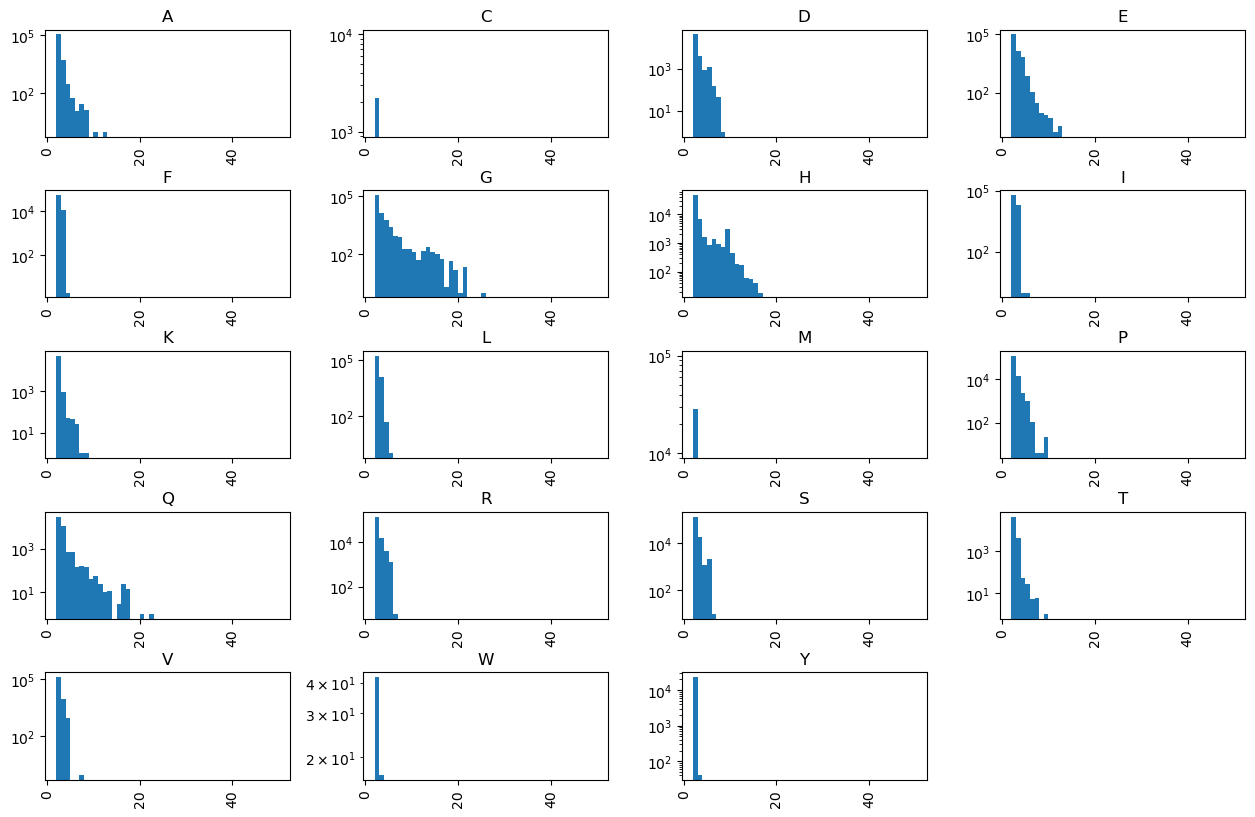

In [16]:
binwidth =1 
bins=range(1 + binwidth,50 + binwidth, binwidth)

human_repeats = filtered_repeats[filtered_repeats["Organism"].str.contains("Homo sapiens")]
max_human_repeats = human_repeats.groupby(["Letter"])['Length'].max()

g = filtered_repeats.hist("Length", by= "Letter", sharex=False, sharey=False, figsize =[15,10], bins=bins)

axis_index = 0
for axis in g.ravel(): 
    axis.set_yscale('log')
    # plt.axvline(x = max_human_repeats[axis_index], color = 'r', label = 'axvline - full height')
    axis_index += 1

plt.show()

    # axis.set_ylim([1,10000])


# filtered_repeats.hist("Length", by= "Letter", sharex=True, sharey=True)



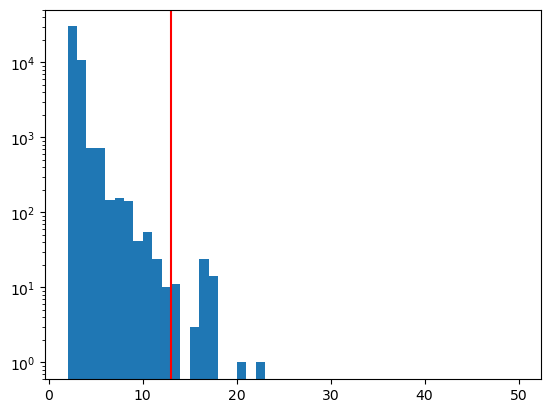

In [18]:
repeatAA = "Q"
Q_reps = filtered_repeats[filtered_repeats["Letter"].str.contains(repeatAA)]
Q_lens = Q_reps["Length"] 

plt.figure()
axes = plt.hist(Q_lens, bins=bins)
plt.axvline(13, color = 'r', label = 'axvline - full height')
plt.yscale("log")


In [ ]:
Q_reps.sort_values("Length",ascending=False)

In [19]:
human_repeats = filtered_repeats[filtered_repeats["Organism"].str.contains("Homo sapiens")]
human_repeats.groupby(["Letter"])['Length'].max()

Letter
A     3
C     2
D     3
E     4
F     3
G     4
H    10
I     3
K     3
L     3
M     2
P     4
Q    13
R     5
S     5
T     3
V     4
Y     2
Name: Length, dtype: int64